In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import norm

In [4]:
df = pd.read_csv("Machine Downtime.csv")
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


## 1.Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [9]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [11]:
df.shape

(2500, 16)

In [13]:
num_duplicates = df.duplicated().sum()

print(f"nm row etr: {num_duplicates}")

nm row etr: 0


In [15]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


## 2.Data Cleaning

# missing values

In [17]:
df.nunique()

Date                                164
Machine_ID                            3
Assembly_Line_No                      3
Hydraulic_Pressure(bar)            1977
Coolant_Pressure(bar)              1628
Air_System_Pressure(bar)           2472
Coolant_Temperature                 275
Hydraulic_Oil_Temperature(?C)       209
Spindle_Bearing_Temperature(?C)     204
Spindle_Vibration(?m)              1144
Tool_Vibration(?m)                 2350
Spindle_Speed(RPM)                 1180
Voltage(volts)                      238
Torque(Nm)                         1327
Cutting(kN)                         170
Downtime                              2
dtype: int64

In [19]:
df.isna().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [21]:
null_column = df[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
                 'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
                 'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
                 'Torque(Nm)', 'Cutting(kN)']]
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
    'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
    'Torque(Nm)', 'Cutting(kN)']] = imp.fit_transform(null_column)


In [23]:
df.isna().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(?C)      0
Spindle_Bearing_Temperature(?C)    0
Spindle_Vibration(?m)              0
Tool_Vibration(?m)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [25]:
df.shape # Same shape as we preserve the nan values

(2500, 16)

   # Detecting outliers

In [27]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in column '{col}':")
        print(outliers)

Outliers in column 'Hydraulic_Pressure(bar)':
2058   -14.326454
Name: Hydraulic_Pressure(bar), dtype: float64
Outliers in column 'Coolant_Pressure(bar)':
851    11.350
853    11.300
913     0.325
Name: Coolant_Pressure(bar), dtype: float64
Outliers in column 'Air_System_Pressure(bar)':
125     5.091411
674     5.063480
739     7.971607
800     7.804750
1135    7.712441
1190    7.973992
1659    7.781151
1910    5.329777
2101    5.151876
2102    5.305506
2147    7.644786
2280    5.283833
Name: Air_System_Pressure(bar), dtype: float64
Outliers in column 'Coolant_Temperature':
1035    98.2
Name: Coolant_Temperature, dtype: float64
Outliers in column 'Hydraulic_Oil_Temperature(?C)':
127     37.1
337     57.9
375     36.4
534     59.5
588     61.4
597     37.4
614     59.2
724     36.9
825     35.2
1002    60.3
1231    37.5
1265    58.1
1342    59.5
1536    36.2
1602    59.1
1728    57.7
1733    36.1
1999    59.2
2177    58.7
2427    57.9
2453    35.8
Name: Hydraulic_Oil_Temperature(?C), dty

# visula two coulmns with outliers

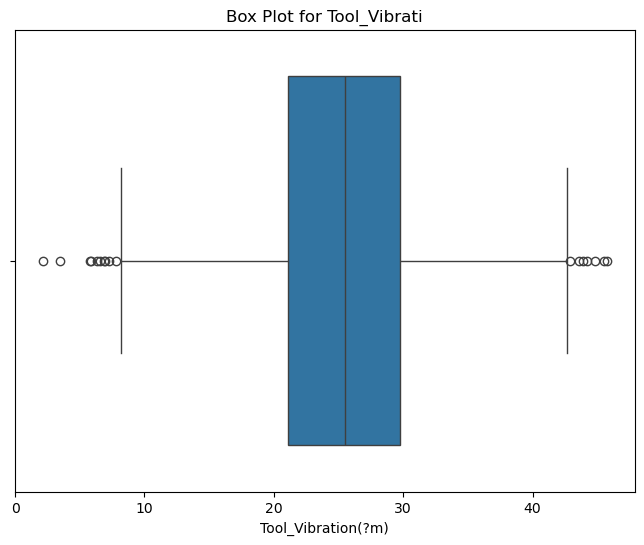

In [29]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['Tool_Vibration(?m)'])   
plt.title('Box Plot for Tool_Vibrati')  
plt.show()

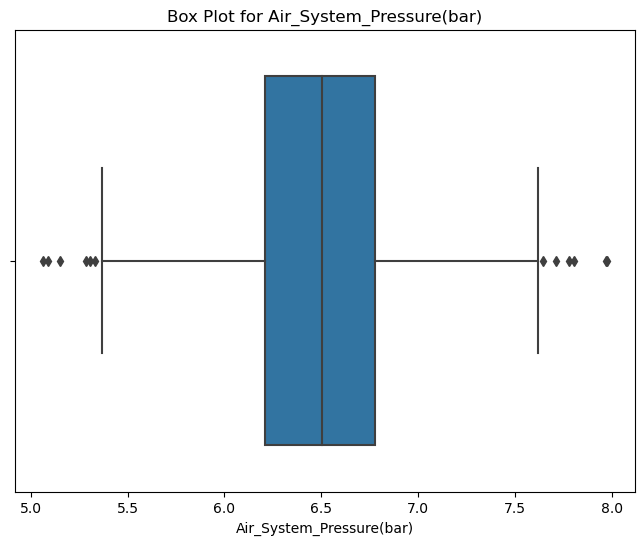

In [16]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['Air_System_Pressure(bar)'])   
plt.title('Box Plot for Air_System_Pressure(bar)')  
plt.show()

## Analysis Questions

# 1-Is there a correlation between machine parameters and machine failure?

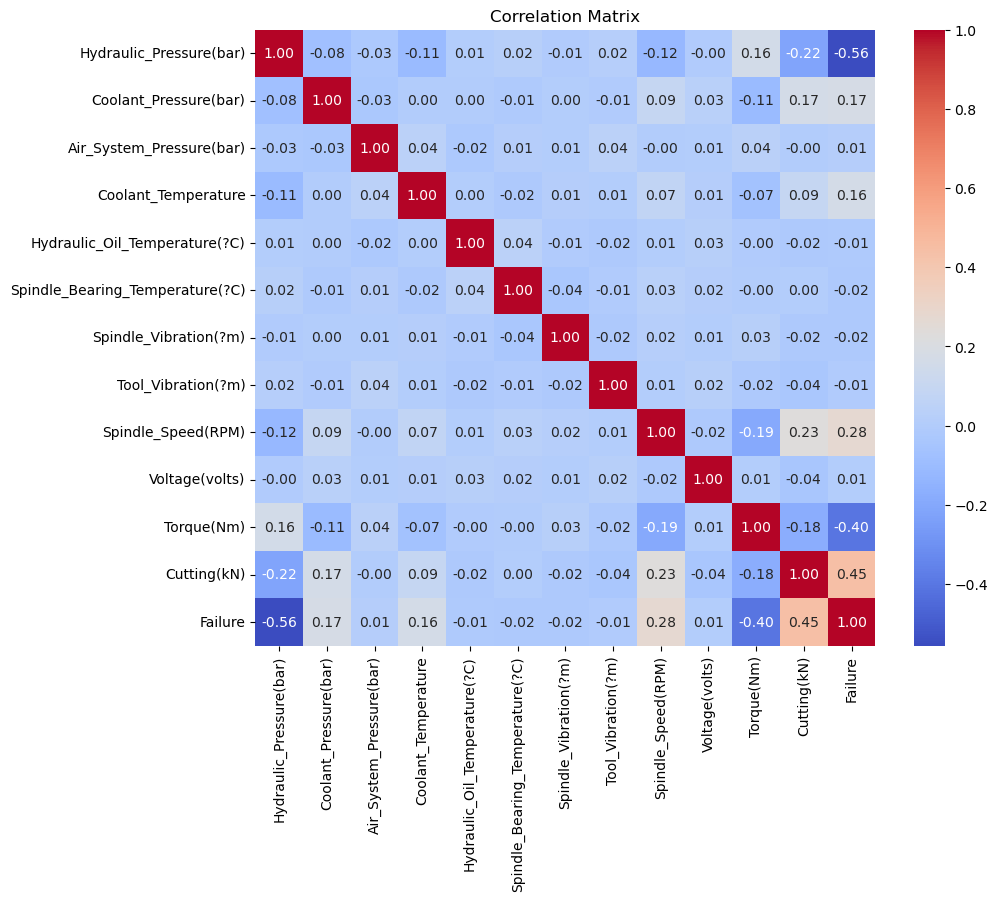

In [31]:
df['Failure'] = df['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)
numeric_df = df.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2- What is the average hydraulic oil temperature for each assembly line?fferent machines?

In [18]:
assembly_lines = df["Assembly_Line_No"].unique()
for line in assembly_lines:
    avg_temp = df[df["Assembly_Line_No"] == line]["Hydraulic_Oil_Temperature(?C)"].mean()
    print(f"Avg Hydraulic Oil Temp for {line}: {avg_temp}")

Avg Hydraulic Oil Temp for Shopfloor-L1: 47.5616704805492
Avg Hydraulic Oil Temp for Shopfloor-L3: 47.55709046454767
Avg Hydraulic Oil Temp for Shopfloor-L2: 47.739232673267324


# 3- Are there any machines that consistently operate outside the optimal range for
# hydraulic or coolant pressure?

Machines Consistently Operating Outside Optimal Ranges:
             Machine_ID  Hydraulic_Violation_Percentage  \
0  Makino-L1-Unit1-2013                       59.496568   
1  Makino-L2-Unit1-2015                       58.168317   
2  Makino-L3-Unit1-2015                       62.224939   

   Coolant_Violation_Percentage  
0                     48.398169  
1                     46.287129  
2                     46.332518  


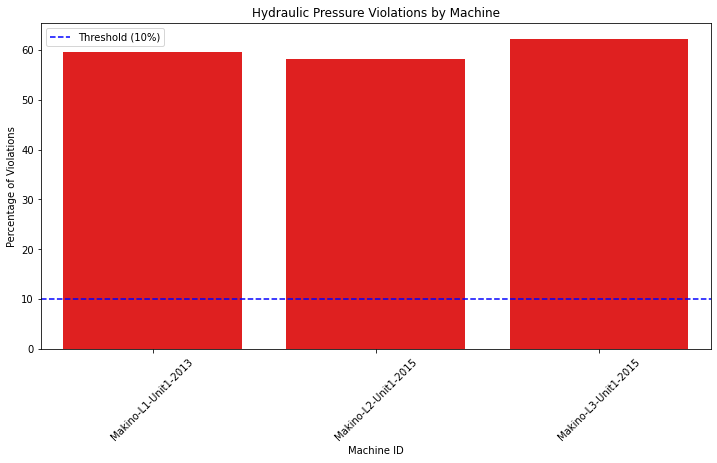

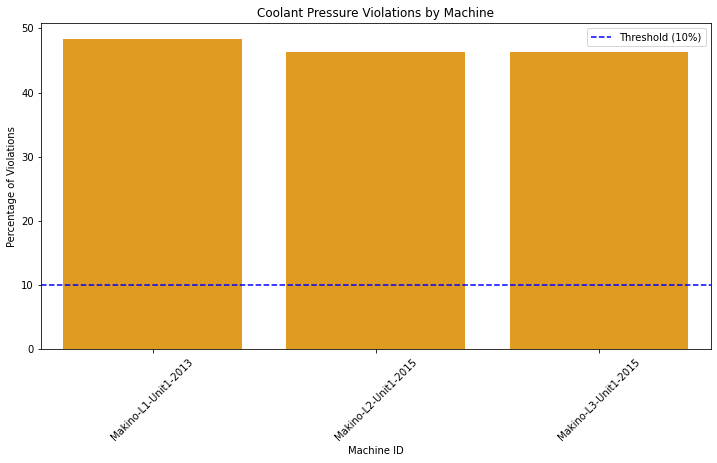

In [18]:

optimal_hydraulic_pressure_range = (100, 150) 
optimal_coolant_pressure_range = (2, 5)       
hydraulic_outside_range = df[
    (df['Hydraulic_Pressure(bar)'] < optimal_hydraulic_pressure_range[0]) |
    (df['Hydraulic_Pressure(bar)'] > optimal_hydraulic_pressure_range[1])
]

coolant_outside_range = df[
    (df['Coolant_Pressure(bar)'] < optimal_coolant_pressure_range[0]) |
    (df['Coolant_Pressure(bar)'] > optimal_coolant_pressure_range[1])
]
hydraulic_violations = hydraulic_outside_range.groupby('Machine_ID').size().reset_index(name='Hydraulic_Violations')

coolant_violations = coolant_outside_range.groupby('Machine_ID').size().reset_index(name='Coolant_Violations')
violations = pd.merge(hydraulic_violations, coolant_violations, on='Machine_ID', how='outer').fillna(0)

violations['Total_Records'] = df.groupby('Machine_ID').size().reset_index(name='Total_Records')['Total_Records']
violations['Hydraulic_Violation_Percentage'] = (violations['Hydraulic_Violations'] / violations['Total_Records']) * 100
violations['Coolant_Violation_Percentage'] = (violations['Coolant_Violations'] / violations['Total_Records']) * 100

threshold = 10
consistent_violators = violations[
    (violations['Hydraulic_Violation_Percentage'] > threshold) |
    (violations['Coolant_Violation_Percentage'] > threshold)
]

print("Machines Consistently Operating Outside Optimal Ranges:")
print(consistent_violators[['Machine_ID', 'Hydraulic_Violation_Percentage', 'Coolant_Violation_Percentage']])
plt.figure(figsize=(12, 6))
sns.barplot(x='Machine_ID', y='Hydraulic_Violation_Percentage', data=consistent_violators, color='red')
plt.axhline(threshold, color='blue', linestyle='--', label='Threshold (10%)')
plt.title('Hydraulic Pressure Violations by Machine')
plt.xlabel('Machine ID')
plt.ylabel('Percentage of Violations')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Machine_ID', y='Coolant_Violation_Percentage', data=consistent_violators, color='orange')
plt.axhline(threshold, color='blue', linestyle='--', label='Threshold (10%)')
plt.title('Coolant Pressure Violations by Machine')
plt.xlabel('Machine ID')
plt.ylabel('Percentage of Violations')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 4-Do machines with higher spindle bearing temperatures also experience higher spindle vibrations?

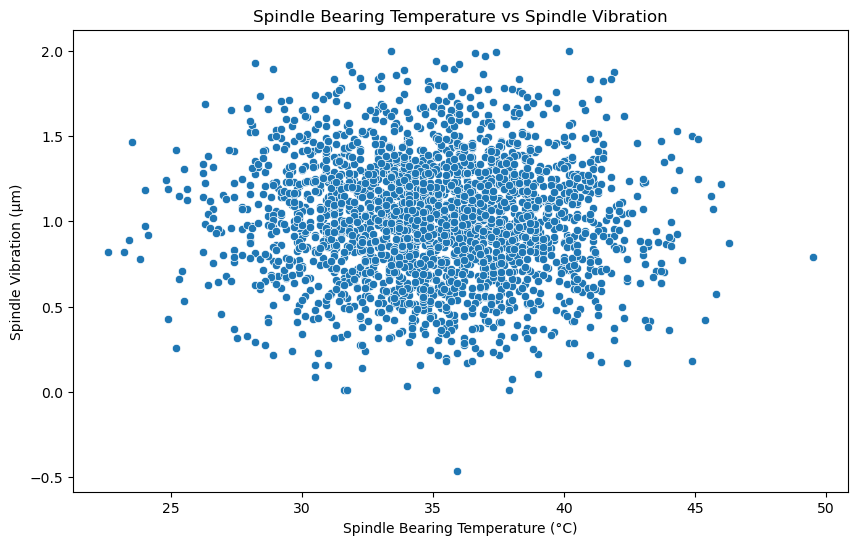

Correlation between Spindle Bearing Temperature and Spindle Vibration: -0.04
There is little to no correlation.


In [19]:
df_cleaned = df.dropna(subset=['Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spindle_Bearing_Temperature(?C)', y='Spindle_Vibration(?m)', data=df_cleaned)
plt.title('Spindle Bearing Temperature vs Spindle Vibration')
plt.xlabel('Spindle Bearing Temperature (°C)')
plt.ylabel('Spindle Vibration (µm)')
plt.show()

correlation = df_cleaned['Spindle_Bearing_Temperature(?C)'].corr(df_cleaned['Spindle_Vibration(?m)'])
print(f"Correlation between Spindle Bearing Temperature and Spindle Vibration: {correlation:.2f}")

if correlation > 0.5:
    print("There is a strong positive correlation.")
elif correlation > 0.3:
    print("There is a moderate positive correlation.")
else:
    print("There is little to no correlation.")

# 5-What is the comparasion of the distributions of Coolant_Temperature between Machine_Failure and No_Machine_Failure ?

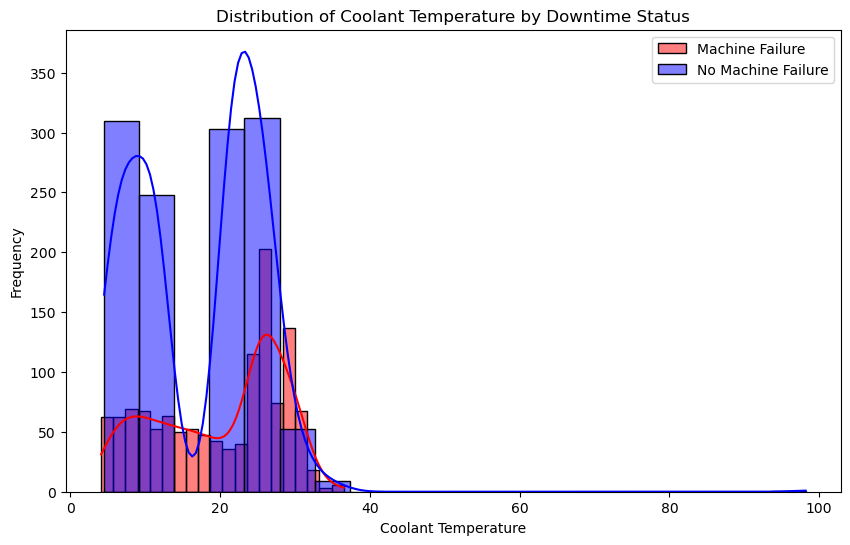

In [24]:
non_failure_df = df[df['Downtime'] == 'No_Machine_Failure']
failure_df = df[df['Downtime'] == 'Machine_Failure']

plt.figure(figsize=(10, 6))
sns.histplot(failure_df['Coolant_Temperature'], kde=True, color='red', label='Machine Failure', bins=20)
sns.histplot(non_failure_df['Coolant_Temperature'], kde=True, color='blue', label='No Machine Failure', bins=20)
plt.title('Distribution of Coolant Temperature by Downtime Status')
plt.xlabel('Coolant Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 6-Which assembly line has the best overall performance in terms of temperature, pressure, and vibration metrics?

In [28]:
temperature_metrics = ['Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)']
pressure_metrics = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)']
vibration_metrics = ['Spindle_Vibration(?m)', 'Tool_Vibration(?m)']

all_metrics = temperature_metrics + pressure_metrics + vibration_metrics
assembly_line_performance = df.groupby('Assembly_Line_No')[all_metrics].mean().reset_index()
normalized_performance = assembly_line_performance.copy()
for metric in all_metrics:
    min_val = normalized_performance[metric].min()
    max_val = normalized_performance[metric].max()
    normalized_performance[metric] = (normalized_performance[metric] - min_val) / (max_val - min_val)
for metric in temperature_metrics + vibration_metrics:
    normalized_performance[metric] = 1 - normalized_performance[metric]
normalized_performance['Performance_Score'] = normalized_performance[all_metrics].mean(axis=1)
ranked_assembly_lines = normalized_performance.sort_values(by='Performance_Score', ascending=False)
print("Assembly Line Performance Rankings:")
print(ranked_assembly_lines[['Assembly_Line_No', 'Performance_Score']])
best_assembly_line = ranked_assembly_lines.iloc[0]['Assembly_Line_No']
print(f"\nThe best-performing assembly line is: {best_assembly_line}")

Assembly Line Performance Rankings:
  Assembly_Line_No  Performance_Score
0     Shopfloor-L1           0.677164
1     Shopfloor-L2           0.562502
2     Shopfloor-L3           0.315550

The best-performing assembly line is: Shopfloor-L1


## 7-What is The Distribution of Machine Failure over time

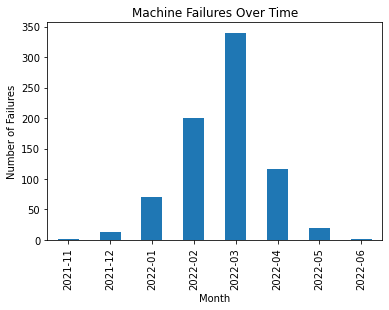

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', dayfirst=True, errors='coerce')

df[df['Downtime'] == 'Machine_Failure'].groupby(df['Date'].dt.to_period('M')).size().plot(kind='bar')
plt.title('Machine Failures Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Failures')
plt.show()

## 8-Which machines have the highest failure rates?

# calculate the count of failure per each machine

In [32]:
machine_failure_counts=df[df['Downtime']=='Machine_Failure']['Machine_ID'].value_counts()
machine_failure_counts

Machine_ID
Makino-L1-Unit1-2013    454
Makino-L3-Unit1-2015    415
Makino-L2-Unit1-2015    396
Name: count, dtype: int64

# Visulize counts of machine failure by each machine

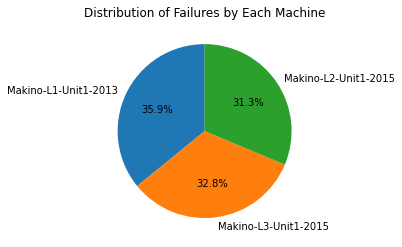

In [33]:
machine_failure_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Failures by Each Machine')
plt.ylabel('')
plt.show()

## 9-Are there any machines or assembly lines with unusual patterns in hydraulic pressure or coolant temperature?

Machines/Assembly Lines with Unusual Patterns:
             Machine_ID Assembly_Line_No  Unusual_Count
0  Makino-L2-Unit1-2015     Shopfloor-L2              1
1  Makino-L3-Unit1-2015     Shopfloor-L3              1


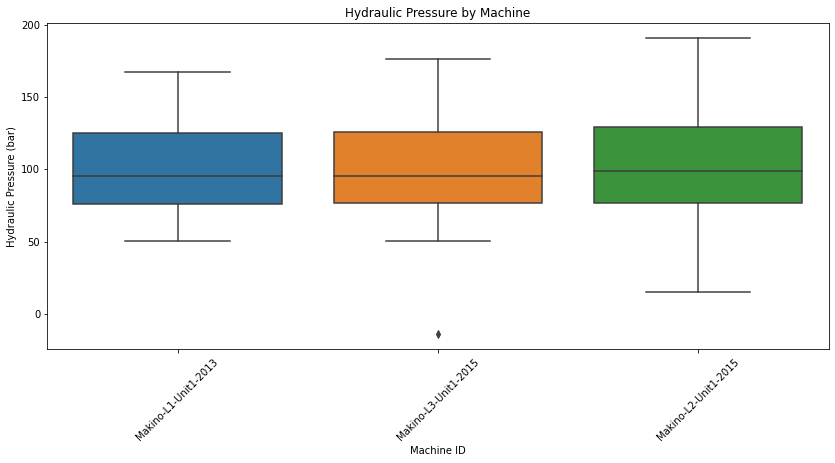

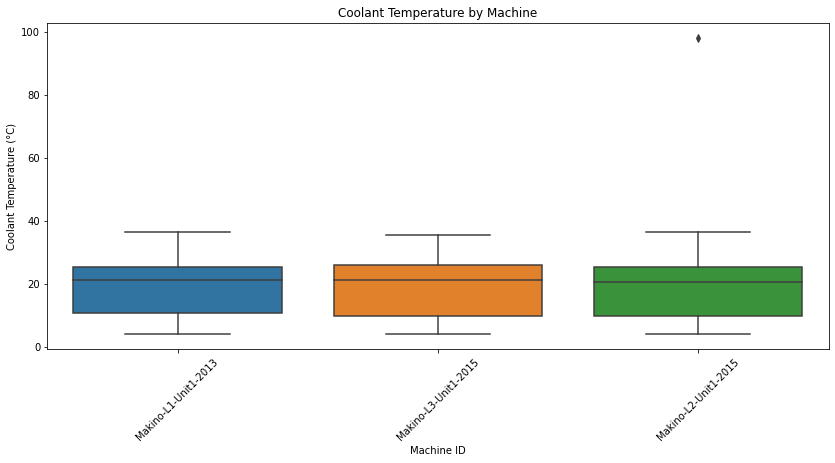

In [34]:
from scipy.stats import zscore
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df_cleaned = df.dropna(subset=['Hydraulic_Pressure(bar)', 'Coolant_Temperature'])
df_cleaned['Hydraulic_Pressure_ZScore'] = zscore(df_cleaned['Hydraulic_Pressure(bar)'])
df_cleaned['Coolant_Temperature_ZScore'] = zscore(df_cleaned['Coolant_Temperature'])
zscore_threshold = 3
unusual_pressure = df_cleaned[np.abs(df_cleaned['Hydraulic_Pressure_ZScore']) > zscore_threshold]
unusual_temperature = df_cleaned[np.abs(df_cleaned['Coolant_Temperature_ZScore']) > zscore_threshold]
unusual_patterns = pd.concat([unusual_pressure, unusual_temperature]).drop_duplicates()
unusual_machines = unusual_patterns.groupby(['Machine_ID', 'Assembly_Line_No']).size().reset_index(name='Unusual_Count')

print("Machines/Assembly Lines with Unusual Patterns:")
print(unusual_machines.sort_values(by='Unusual_Count', ascending=False))
plt.figure(figsize=(14, 6))
sns.boxplot(x='Machine_ID', y='Hydraulic_Pressure(bar)', data=df_cleaned)
plt.title('Hydraulic Pressure by Machine')
plt.xlabel('Machine ID')
plt.ylabel('Hydraulic Pressure (bar)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Machine_ID', y='Coolant_Temperature', data=df_cleaned)
plt.title('Coolant Temperature by Machine')
plt.xlabel('Machine ID')
plt.ylabel('Coolant Temperature (°C)')
plt.xticks(rotation=45)
plt.show()
example_machine = unusual_machines.iloc[0]['Machine_ID']  
machine_data = df_cleaned[df_cleaned['Machine_ID'] == example_machine]


# 10-What is the hightest frequency value of Hydraulic_Pressure(bar) when machine failure ?

In [35]:
hightest_frequency_values=failure_df[['Hydraulic_Pressure(bar)']].mode()
print("Hightest Frequency Values of Coolant_Temperature during failure")
print(hightest_frequency_values)

Hightest Frequency Values of Coolant_Temperature during failure
   Hydraulic_Pressure(bar)
0                    71.04
1                    80.27
